# <font color = 'blue'> <center> Signals and Systems CA1

In [1]:
import matplotlib.pyplot as plt
from mpmath import *
import scipy.signal as signal
import numpy as np
import scipy.integrate as integrate

# <font color = 'blue'> PART 1
    


<font size=4> we try to write a function for unit step and ramp function. bellow you can see the function definitions.

In [2]:
def unitstep(t):
    if(t < 0):
        return 0
    else:
        return 1



In [3]:
def ramp(t):
    if(t < 0):
        return 0
    else:
        return t

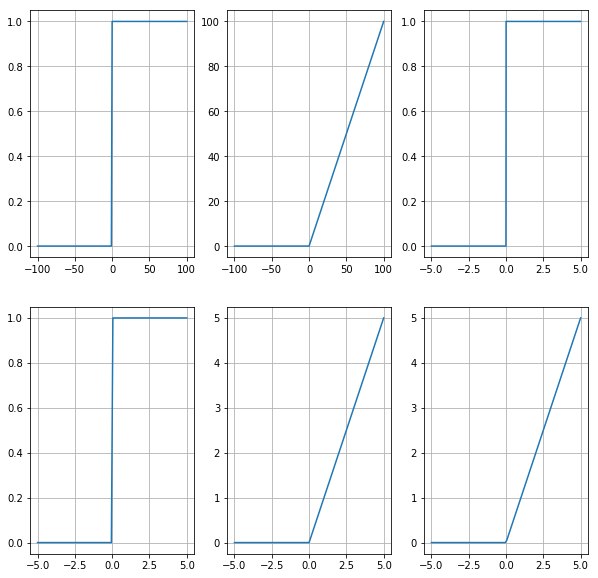

In [4]:
x = np.linspace(-5,5,1000)
x1 = np.arange(-100,101)
x2 = np.arange(-100,101)


xu100 = np.linspace(-5,5,1000)
xu10 = np.linspace(-5,5,100)

xr100 = np.linspace(-5,5,1000)
xr10 = np.linspace(-5,5,100)


yu100 = list(map(unitstep,xu100))
yu10 = list(map(unitstep,xu10))
yr100 = list(map(ramp,xr100))
yr10 = list(map(ramp,xr10))
y1 = list(map(unitstep,x1))
y2 = list(map(ramp,x2))



fig , axis = plt.subplots(nrows = 2 , ncols = 3 , figsize = (10,10))

axis[0,0].plot(x1,y1)
axis[0,0].grid()


axis[0,1].plot(x2,y2)
axis[0,1].grid()

axis[0,2].plot(xu100,yu100)
axis[0,2].grid()


axis[1,0].plot(xu10,yu10)
axis[1,0].grid()


axis[1,1].plot(xr100,yr100)
axis[1,1].grid()


axis[1,2].plot(xr10,yr10)
axis[1,2].grid()
plt.show()

<font size = 4> In this part we try to write x(t) signal bellow with form of ramp and unit step function.
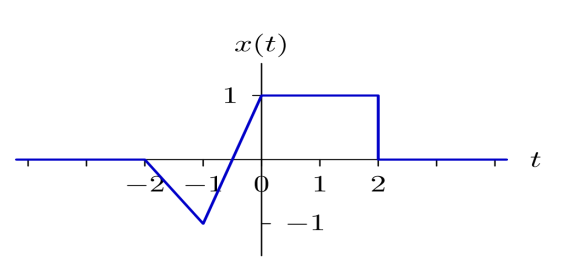

<font size = 4> here is a proper function to show x(t) in a form of ramp and unit step function.


 <font size = 4> x (t) = - ramp( t + 2 ) + 3 * ramp( t + 1 ) - 2 * ramp( t ) - unitstep( t - 2 )

In [5]:
def X(t):
    return -1 * ramp(t + 2) + 3 * ramp(t + 1) - 2 * ramp(t) - unitstep(t - 2)



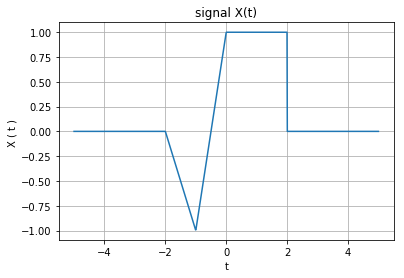

In [6]:
t = np.linspace(-5,5,1000)
y = list(map(X, t))
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('X ( t ) ')
plt.title('signal X(t)')
plt.grid()
plt.show()





<font size = 4 color = 'black' > Now in this part we use shifting and time scaling to make signal y1(t) from x(t). You can see signal y1(t) bellow.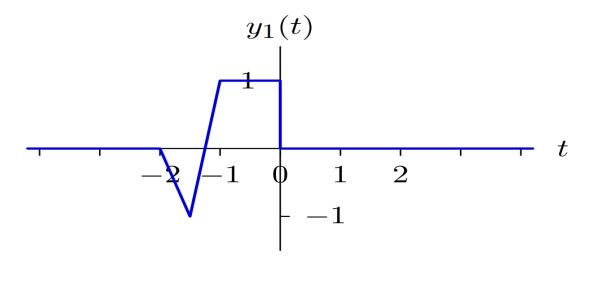
    
 <font size = 4 color = 'black'>  It is clear that y1(t)  = x( 2 * t + 2 ).

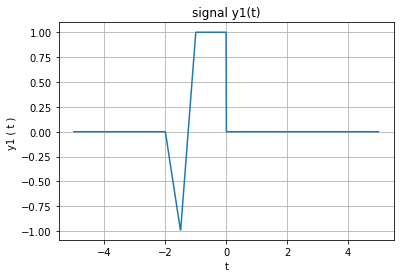

In [7]:
y1 = list(map(X, 2 * t + 2))
plt.plot(t,y1)
plt.xlabel('t')
plt.ylabel('y1 ( t ) ')
plt.title('signal y1(t)')
plt.grid()
plt.show()

<font size = 4 > now we reapeat steps above for signal y2(t).
    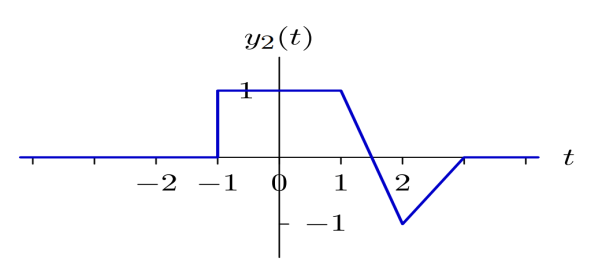

<font size=4> Again it is clear that  y2(t) = x ( - t + 1 ) according to shifting and time reversal.

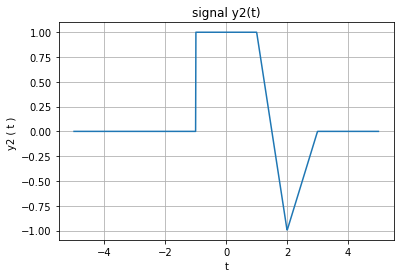

In [8]:
y2= list(map(X, -1 * t + 1))
plt.plot(t,y2)
plt.xlabel('t')
plt.ylabel('y2 ( t ) ')
plt.title('signal y2(t)')
plt.grid()
plt.show()

# <font color = 'blue'> PART 2

<font size=4> In this part we define some signals. bellow you can see them.
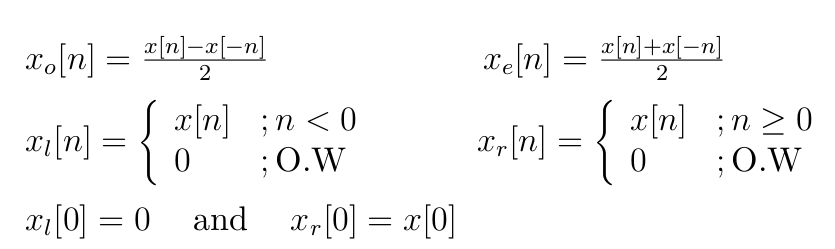

<font size=4> Now we define functions that calculate x_r , x_l , x_e , x_o for a desired input signal.then plot it.

In [9]:
def x_odd(n ):
    return (X(n) - X(-1 * n)) / 2

def x_even(n):
    return (X(n) + X(-1 * n)) / 2

def x_left(n):
    if(n < 0):
        return X(n)
    else:
        return 0
    
def x_right(n):
    if(n >= 0):
        return X(n)
    else:
        return 0

<font size=4> Now we use signal x(t) in part 1 and with frequency 100 sample per seconds show these plots.

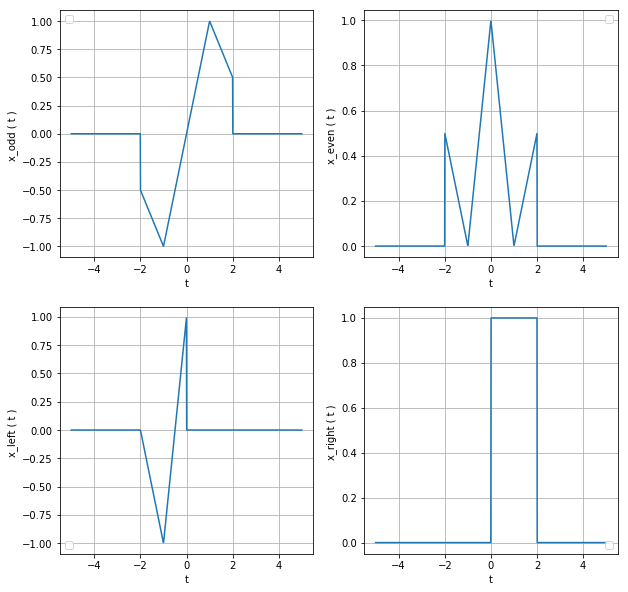

In [10]:
t = np.linspace(-5,5,1000)

fig , axis = plt.subplots(nrows = 2 , ncols = 2 , figsize = (10,10))
axis[0,0].set(xlabel = 't' , ylabel='x_odd ( t ) ')
axis[0,0].plot(t ,list(map(x_odd,t)))
axis[0,0].grid()
axis[0,0].legend (loc = 'upper left')




axis[0,1].set(xlabel = 't' , ylabel='x_even ( t ) ')
axis[0,1].plot(t ,list(map(x_even,t)))
axis[0,1].grid()
axis[0,1].legend (loc = 'upper right')



axis[1,1].set(xlabel = 't' , ylabel='x_right ( t ) ')
axis[1,1].plot(t ,list(map(x_right,t)))
axis[1,1].legend (loc = 'lower right')
axis[1,1].grid()


axis[1,0].set(xlabel = 't' , ylabel='x_left ( t ) ')
axis[1,0].plot(t ,list(map(x_left,t)))
axis[1,0].legend (loc = 'lower left')
axis[1,0].grid()

plt.show()

<font size=4 > It is asked if we can define signal x[n] in case we have x_right and also x_even?

<font size=4 > according to function bellow we can get our initial signal. now we plot both our initial signal X(t) and also the remade signal.


In [11]:
def bazsazix_with_x_right_and_x_even(t):
    if(t >= 0):
        return x_right(t)
    else:
        return 2 * x_even(t) - x_right(-1 * t)


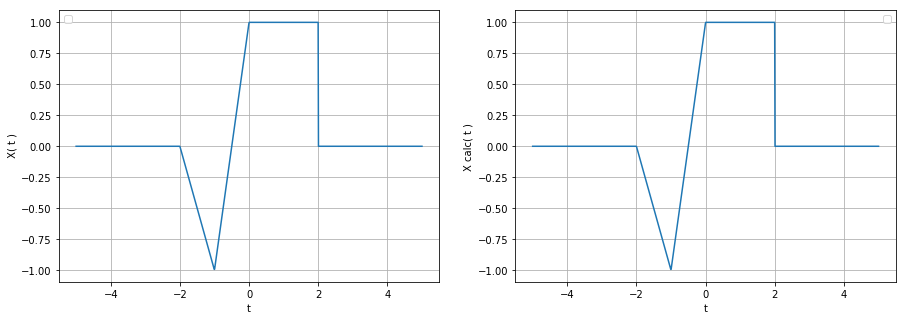

In [12]:
t = np.linspace(-5,5,1000)

fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
axis[0].set(xlabel = 't',ylabel=' X( t )')
axis[0].plot(t ,list(map(X,t)))
axis[0].grid()
axis[0].legend(loc = 'upper left')




axis[1].set(xlabel = 't' , ylabel='X calc( t )')
axis[1].plot(t ,list(map(bazsazix_with_x_right_and_x_even,t)))
axis[1].grid()
axis[1].legend(loc = 'upper right')



plt.show()


<font size=4> As we see the plots are as same sa each other.
    Again it is asked if we can define signal x[n] in case we have x_left and also x_odd?

<font size=4 > According to function bellow we can get our initial signal. now we plot both our initial signal X(t) and also the remade signal.


In [13]:
def bazsazix_with_x_left_and_x_odd(t):
    if(t <= 0):
        return x_left(t)
    else:
        return  2 * x_odd(t) + x_left(-1 * t)

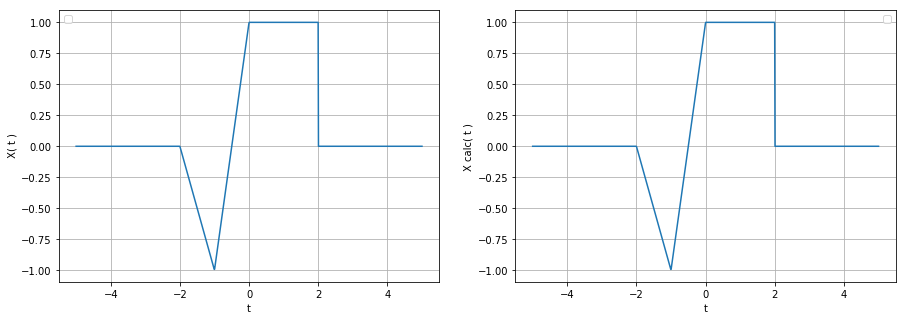

In [14]:
t = np.linspace(-5,5,1000)

fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
axis[0].set(xlabel = 't',ylabel=' X( t )')
axis[0].plot(t ,list(map(X,t)))
axis[0].grid()
axis[0].legend(loc = 'upper left')




axis[1].set(xlabel = 't' , ylabel='X calc( t )')
axis[1].plot(t ,list(map(bazsazix_with_x_left_and_x_odd,t)))
axis[1].grid()
axis[1].legend(loc = 'upper right')



plt.show()

<font size=4> So in both case the answer was yes!

# <font color = 'blue'> PART 3

<font size=4>In this part we want to check that the system is LTI or not.As we know we should check linear and also time Invariant property.Imagine y(t) is our system and x1(t) and x2(t) is our inputs.
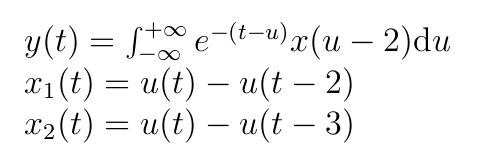

<font size=4> for checking linear property at first we calculate 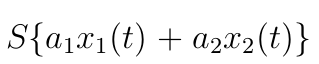
 then we calculte 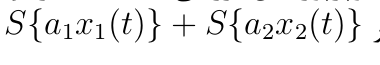 and we check their equality.

In [15]:
t = np.linspace(-5,5,1000)
def x1(t):
    return unitstep(t) -  unitstep(t-2)
def x2(t):
    return unitstep(t) - unitstep(t-3)



<font size=4> Here you can see the two pulse signals above.

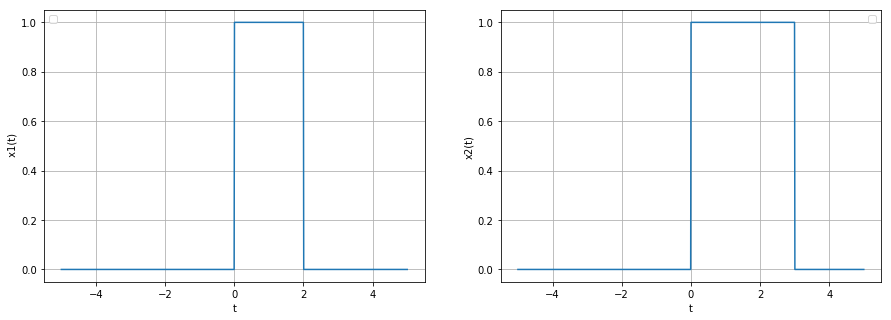

In [16]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
axis[0].set(xlabel = 't',ylabel=' x1(t)')
axis[0].plot(t ,list(map(x1,t)))
axis[0].grid()
axis[0].legend(loc = 'upper left')


axis[1].set(xlabel = 't' , ylabel='x2(t)')
axis[1].plot(t ,list(map(x2,t)))
axis[1].grid()
axis[1].legend(loc = 'upper right')

plt.show()

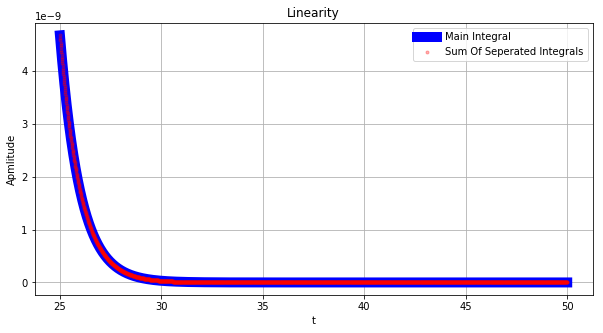

In [35]:
def make_t(start, end, sampling_freq):
    t = np.linspace(start, end + np.finfo(float).eps,(end - start)*sampling_freq + 1)
    return t

from scipy.integrate import quad;

class XtIntegraler:
    def __init__(self, start, end, t, signal):
        self.start = start
        self.end = end
        self.signal = signal
        self.results = []
        for i in range(len(t)):
            self.results.append(self.integral_of_yt(t[i]))
            
    def formula(self, u, t):
        return np.exp(-(t - u))*self.signal(u-2)
    
    def integral_of_yt(self, t):
        return quad(self.formula, -np.inf, np.inf, args=(t, ))[0];


start = 25
end = 50
sampling_freq = 100

t = make_t(start, end, sampling_freq)
    
def step(t):
    if t >= 0:
        return 1;
    else:
        return 0

def x1(t):
    return step(t) - step(t-2)

def x2(t):
    return step(t) - step(t-3)

a1 = 2
a2 = 3

def a1x1(t):
    return a1*x1(t)

def a2x2(t):
    return a2*x2(t)

def Sum(t):
    return a1x1(t)+a2x2(t)

integral_a1x1 = XtIntegraler(start, end, t, a1x1)    
integral_a2x2 = XtIntegraler(start, end, t, a2x2)
integral_sum =  XtIntegraler(start, end, t, Sum)

seperate_sum = np.array(integral_a1x1.results) + np.array(integral_a2x2.results)


plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('Apmlitude')
plt.title('Linearity')
plt.plot(t, integral_sum.results, '-b', linewidth=10)
plt.plot(t, seperate_sum, '.r', alpha=0.3)
plt.legend(['Main Integral', 'Sum Of Seperated Integrals'])
plt.grid()
plt.show();

<font size=4> As you can see, the  𝑆{𝑎1𝑥1(𝑡)+𝑎2𝑥2(𝑡)}=𝑆{𝑎1𝑥1(𝑡)}+𝑆{𝑎2𝑥2(𝑡)}

<font size=4> - In this Question we are to give the $x_1(t)$ signal to the $y(t)$ system
<br>and $x_1(t-3)$ too! 
<br>$x_1(t)\implies y_1(t)$<br>$x_1(t-3)\implies y_2(t)$ 

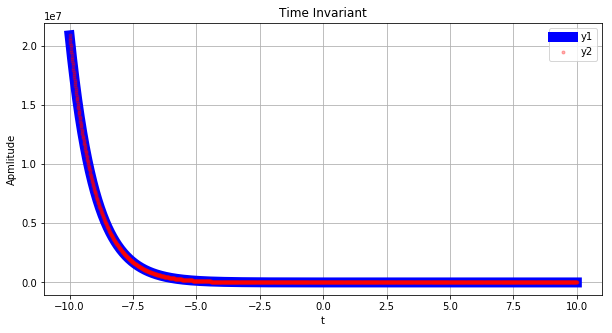

In [36]:
class XtIntegraler:
    def __init__(self, start, end, t, signal):
        self.start = start
        self.end = end
        self.signal = signal
        self.results = []
        for i in range(len(t)):
            self.results.append(self.integral_of_yt(t[i]))
            
    def formula(self, u, t):
        return np.exp(-(t - u))*self.signal(u-2)
    
    def integral_of_yt(self, t):
        return quad(self.formula, -13, 13, args=(t, ))[0];


def x1_s3(t):
    return x1(t-3)

start = -10
end = 10
sampling_freq = 100

t = make_t(start, end, sampling_freq)
y1_out = XtIntegraler(start, end, t-3, x1).results    
y2_out = XtIntegraler(start, end, t, x1_s3).results

plt.figure(figsize=(10,5))
plt.xlabel('t')
plt.ylabel('Apmlitude')
plt.title('Time Invariant')
plt.plot(t, y1_out, '-b', linewidth=10)
plt.plot(t, y2_out, '.r', alpha=0.3)
plt.legend(['y1', 'y2'])
plt.grid()
plt.show();


<font size=4> so because it is linear and changes apply to the y2 when shifting  doen not change anything so it is LTI.

# <font color = 'blue'> PART 4

<font size=4>In this part we write a function to caculate Energy of a signal , according to the formula.
    <br> $E_s = \Sigma_{-\infty}^{+\infty}|x(t)|^2$

In [19]:
def discrete_energy(x):
    energy = 0
    for i in range(len(x)):
        energy += abs(x[i]) * abs(x[i])
    return energy

<font size=4> The signals which we are calculating its energy, are discrete but we want
<br>the continous form of it. A assumption is that each value of each point
<br>between two discrete point is as the same as the other. So the continuous
<br>form of the signal is T times more than the discrete one, which $T=\dfrac{1}{SamplingFreq}$
<br>as you can see, shifting signal has no effect on the energy of that signal(not that much :)))

In [20]:
def unitstep(t):
    if(t < 0):
        return 0
    else:
        return 1

def ramp(t):
    if(t < 0):
        return 0
    else:
        return t
    
def X(t):
    return -1 * ramp(t + 2) + 3 * ramp(t + 1) - 2 * ramp(t) - unitstep(t - 2)

def make_t(start, end, sampling_freq):
    t = np.linspace(start, end + np.finfo(float).eps,(end - start)*sampling_freq + 1)
    return t

sampling_freq = 100
start = -10
end = 10
t = make_t(start, end, sampling_freq)

xt_y  = list(map(X, t))
y1t_y =list(map(X, 2 * t + 2))
y2t_y =  list(map(X, -1 * t + 1))



print(discrete_energy(xt_y)/sampling_freq)
print(discrete_energy(y1t_y )/sampling_freq)
print(discrete_energy(y2t_y)/sampling_freq)

2.6617500000000005
1.3285000000000002
2.6617499999999996


# <font color = 'blue'> PART 5 

<font size=4> In this part we write a function to calculate convolution of two signals according to formula.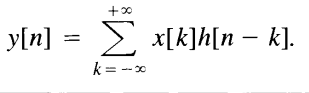

In [21]:
def convolve(signal1, signal2, n):
    convolution_value = 0
    for k in range(-20, 20):
        convolution_value += signal1(k)*signal2(n-k)
    return convolution_value

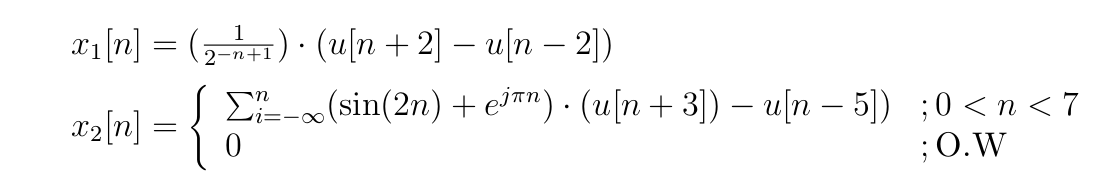

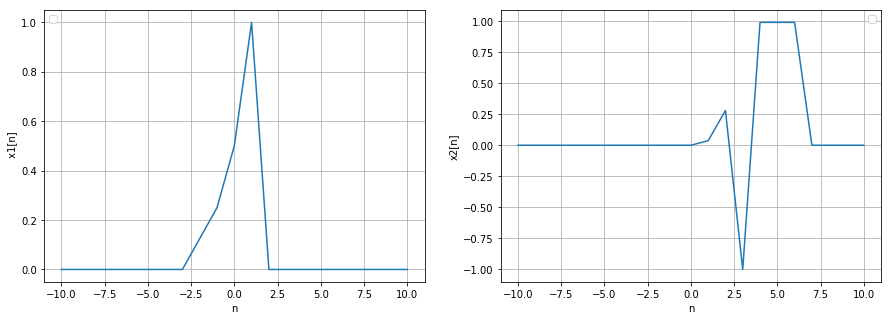

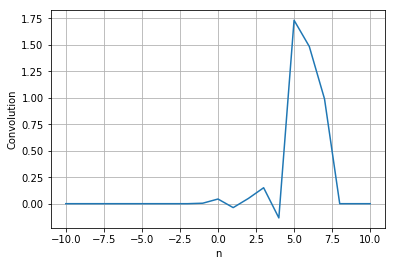

In [38]:
def unitstep(t):
    if(t < 0):
        return 0
    else:
        return 1

def x1(n):
    return (2**(int(n)-1) ) * (unitstep(n+2) - unitstep(n-2)) 

def x2(n):
    if 0 < n < 7:
        s = complex(0,0)
        for i in range(-3, int(n) + 1):
             s += (np.sin(2 * i) + np.cos(np.pi * i) + 1j*np.sin(np.pi*i)) *( unitstep(i + 3) - unitstep(i - 5))
        return s
    else:
        return 0                                      

start = -10                                            
end = 10
sampling_freq = 1
# n = linespace(start,end,1)
n = make_t(start, end, sampling_freq).astype(np.int64)
x1t_values = list(map(x1, n))
x2t_values = list(map(x2, n))



fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
axis[0].set(xlabel = 'n',ylabel=' x1[n]')
axis[0].plot(n ,x1t_values)
axis[0].grid()
axis[0].legend(loc = 'upper left')

axis[1].set(xlabel = 'n' , ylabel='x2[n]')
axis[1].plot(n ,x2t_values)
axis[1].grid()
axis[1].legend(loc = 'upper right')
plt.show()

conv_vals = []
for i in n:
    conv_vals.append(convolve(x1, x2, i))
    

plt.plot(n,conv_vals)
plt.xlabel('n')
plt.ylabel('Convolution')




plt.grid()
plt.show()


# <font color = 'blue'> Bonus Part

<font size=4 >first define h[n] and x[n] according to the text.
  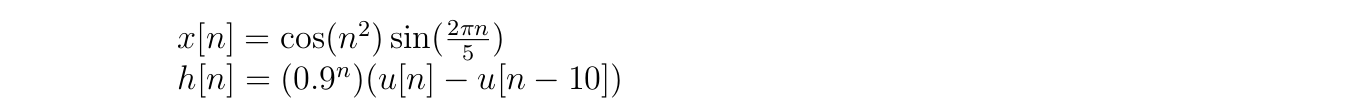

In [25]:
def x(n):
    return np.cos(n**2) * np.sin(2*np.pi*n/5)

def h(n):
    return 0.9**n * (step(n)-step(n-10))

<fonrt size=4 > Now  Checking the h[n] * x[n]

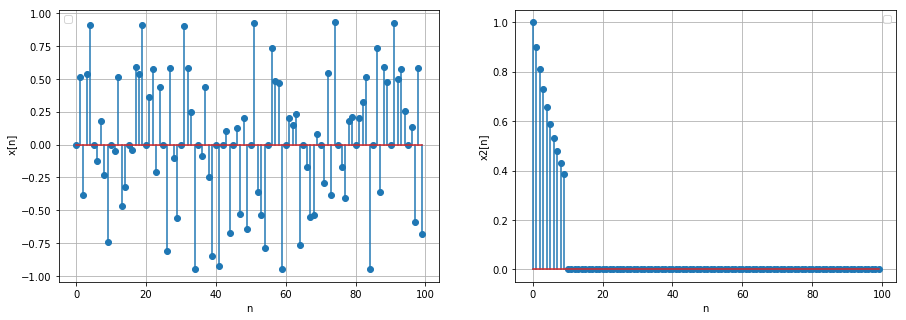

<StemContainer object of 3 artists>

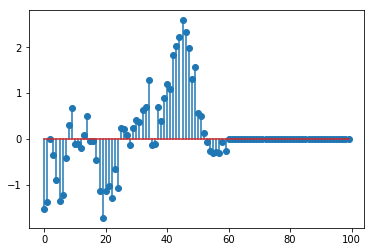

In [27]:
n = make_t(0, 99, 1)
xn_values = list(map(x, n))
hn_values = list(map(h, n))

fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
axis[0].set(xlabel = 'n',ylabel=' x[n]')
axis[0].stem(n ,xn_values)
axis[0].grid()
axis[0].legend(loc = 'upper left')

axis[1].set(xlabel = 'n' , ylabel='x2[n]')
axis[1].stem(n ,hn_values)
axis[1].grid()
axis[1].legend(loc = 'upper right')
plt.show()

conv_value = np.convolve(xn_values, hn_values,'same')
plt.stem(n,conv_value)
